In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
from os.path import isfile

from shutil import copyfile, copy


In [2]:
!ls || dir

 Volume in drive D is Data
 Volume Serial Number is 688F-2CBE

 Directory of D:\Competitions\whale4kaggle

09-Feb-19  12:18 AM    <DIR>          .
09-Feb-19  12:18 AM    <DIR>          ..
09-Feb-19  12:02 AM                13 .gitignore
08-Feb-19  11:42 PM    <DIR>          .ipynb_checkpoints
08-Feb-19  11:41 PM               119 README.md
19-Jan-19  03:09 PM           509,449 sample_submission.csv
08-Feb-19  11:49 PM    <DIR>          test
09-Feb-19  12:18 AM    <DIR>          train
19-Jan-19  03:09 PM           608,673 train.csv
20-Jan-19  05:36 PM           548,226 WhaleReader.ipynb
               5 File(s)      1,666,480 bytes
               5 Dir(s)  756,926,828,544 bytes free


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Read images paths
input_images = glob("train/*")

input_images_csv = pd.read_csv("train.csv")
input_images_csv.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [4]:
# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
print("Extract dataframe details: ")
print(input_images_csv.loc[input_images_csv['Image'] == "a08e781e7.jpg"]['Image'])

print(input_images_csv.loc[input_images_csv['Image'] == "a08e781e7.jpg"]['Image'].values[0])

Extract dataframe details: 
15940    a08e781e7.jpg
Name: Image, dtype: object
a08e781e7.jpg


w_fd3e556 have 50 images @ train/


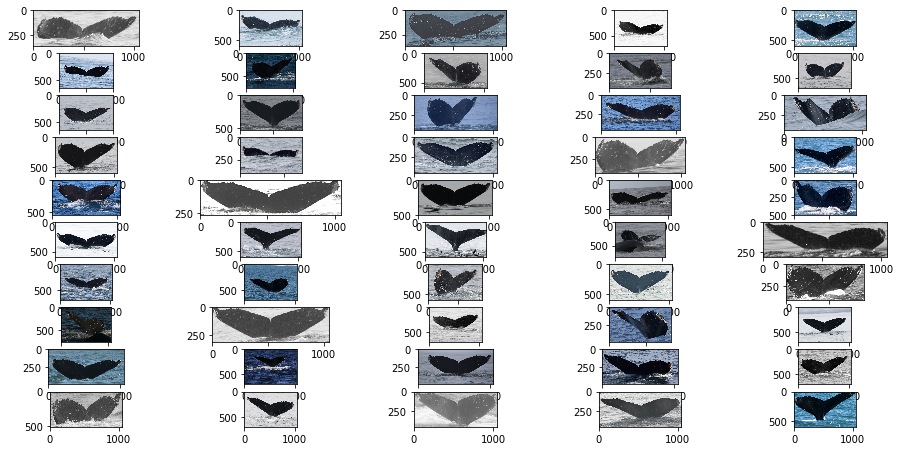

In [61]:

def displayImagesById(images_df, selectedId, path="train/"):
    selectedImages = input_images_csv.loc[input_images_csv['Id'] == selectedId]
    if(len(selectedImages) > 100):
        print("Please select a Id with <=100 images. For '"+ selectedId+ "', there are", len(selectedId), "images.")
        return
    print(selectedId, "have", len(selectedImages), "images @", path)
    i=0
    plt.figure(figsize=(16,10))
    for index, image_row in selectedImages.iterrows():
        img = plt.imread(path+image_row['Image'])
        plt.subplot(len(selectedImages)//4+1,5,i+1)
        plt.imshow(img)
        i+=1
    plt.show()
# displayImagesById(input_images_csv, "w_ffa542b")
# # displayImagesById(input_images_csv, "new_whale")
# displayImagesById(input_images_csv, "w_23a388d")

displayImagesById(input_images_csv, "w_fd3e556")


In [147]:
def diplayRandomImages(images_path, noOfImages=5, imageInSingleRow = 5):
    total_images = len(images_path)
    if(total_images < noOfImages):
        noOfImages = total_images
    plt.figure(figsize=(16,10))
    img_counts = 0
    # for i in np.linspace(0, total_images//noOfImages, num=noOfImages):
    for i in np.random.randint(0, total_images-1, noOfImages):
        img = plt.imread(images_path[int(i)])
        plt.subplot(noOfImages//imageInSingleRow+1, imageInSingleRow, img_counts+1)
        imageName = images_path[int(i)].split("\\")[1]
        imageDetails = input_images_csv.loc[input_images_csv['Image'] == imageName ]
        # print(imageDetails['Image'] )
        plt.title( imageDetails['Image'].values[0] + " (" + imageDetails['Id'].values[0] + ")" )
        plt.imshow(img)
        img_counts +=1
    plt.show()

Some Input Images from training set:


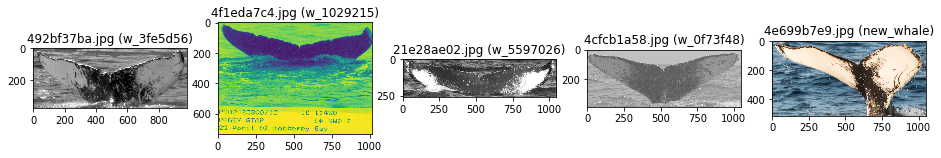

In [148]:
print("Some Input Images from training set:")
diplayRandomImages(input_images, 5)

In [93]:
print(input_images_csv.shape)
input_images_csv.loc[input_images_csv.duplicated(subset=['Id'])].shape
a = input_images_csv.loc[np.equal(True, input_images_csv.duplicated(subset=['Id'], keep=False) )]
a = a.sort_values(by="Id", ascending=False)
a = a[~(a['Id'] == "new_whale")]
print( np.sum(a['Id'] == "w_fd3e556") )

# for i in a['Id']:
#     print( np.sum(a['Id'] == i) )

# input_images_csv.duplicated(subset=['Id'], keep=False)

(25361, 2)
50


In [92]:

def seperateImageByFolder(minImages = 30, path="train/"):
    input_images_csv.loc[input_images_csv.duplicated(subset=['Id'])].shape
    a = input_images_csv.loc[np.equal(True, input_images_csv.duplicated(subset=['Id'], keep=False) )]
    a = a.sort_values(by="Id", ascending=False)
    a = a[~(a['Id'] == "new_whale")]
    selectedIds = []
    for selectedId in a['Id']:
        if( (selectedId not in selectedIds) and np.sum(a['Id'] == selectedId) >= minImages):
            selectedIds.append(selectedId)
            imageDest = "inputGeneratedPerImage/" + selectedId
            selectedImages = input_images_csv.loc[input_images_csv['Id'] == selectedId]
            if not(os.path.isdir(imageDest)):
                os.makedirs(imageDest)
            print("Copying", len(selectedImages), "images to folder: ", imageDest)
            for index, image_row in selectedImages.iterrows():
                b = path+image_row['Image']
                # print('copy ' + selectedId + " " + b)
                copy(b, imageDest)
#                 os.system('copy ' + imageDest + " " + b)

seperateImageByFolder(40)
# w_ffa542b -> 3
# w_23a388d -> 73


Copying 50 images to folder:  inputGeneratedPerImage/w_fd3e556
Copying 45 images to folder:  inputGeneratedPerImage/w_f0fe284
Copying 47 images to folder:  inputGeneratedPerImage/w_d405854
Copying 62 images to folder:  inputGeneratedPerImage/w_9c506f6
Copying 65 images to folder:  inputGeneratedPerImage/w_9b5109b
Copying 49 images to folder:  inputGeneratedPerImage/w_88e4537
Copying 45 images to folder:  inputGeneratedPerImage/w_789c969
Copying 40 images to folder:  inputGeneratedPerImage/w_778e474
Copying 57 images to folder:  inputGeneratedPerImage/w_700ebb4
Copying 40 images to folder:  inputGeneratedPerImage/w_5e8e218
Copying 51 images to folder:  inputGeneratedPerImage/w_564a34b
Copying 54 images to folder:  inputGeneratedPerImage/w_3de579a
Copying 40 images to folder:  inputGeneratedPerImage/w_343f088
Copying 48 images to folder:  inputGeneratedPerImage/w_2b069ba
Copying 73 images to folder:  inputGeneratedPerImage/w_23a388d
Copying 61 images to folder:  inputGeneratedPerImage/w_

In [174]:
a = [True, False]
np.equal(False, a)

array([False,  True])